In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import mmread


In [5]:
# Load the Matrix Market file
matrix_path = "../data/socfb-Texas84/socfb-Texas84.mtx"
adjacency_matrix = mmread(matrix_path).tocoo()
# Convert to a NetworkX graph
G = nx.Graph()
G.add_edges_from(zip(adjacency_matrix.row, adjacency_matrix.col))

# Print basic information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("Sample edges:")
print(list(G.edges())[:10])  # show first 10 edge


Number of nodes: 36364
Number of edges: 1590651
Sample edges:
[(392, 0), (392, 118), (392, 230), (392, 554), (392, 563), (392, 573), (392, 736), (392, 752), (392, 859), (392, 938)]


### Visualize the Graph

/var/folders/vq/qqdd4_y53w9gtp3rcs6xcnzr0000gn/T/ipykernel_13915/1681415398.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


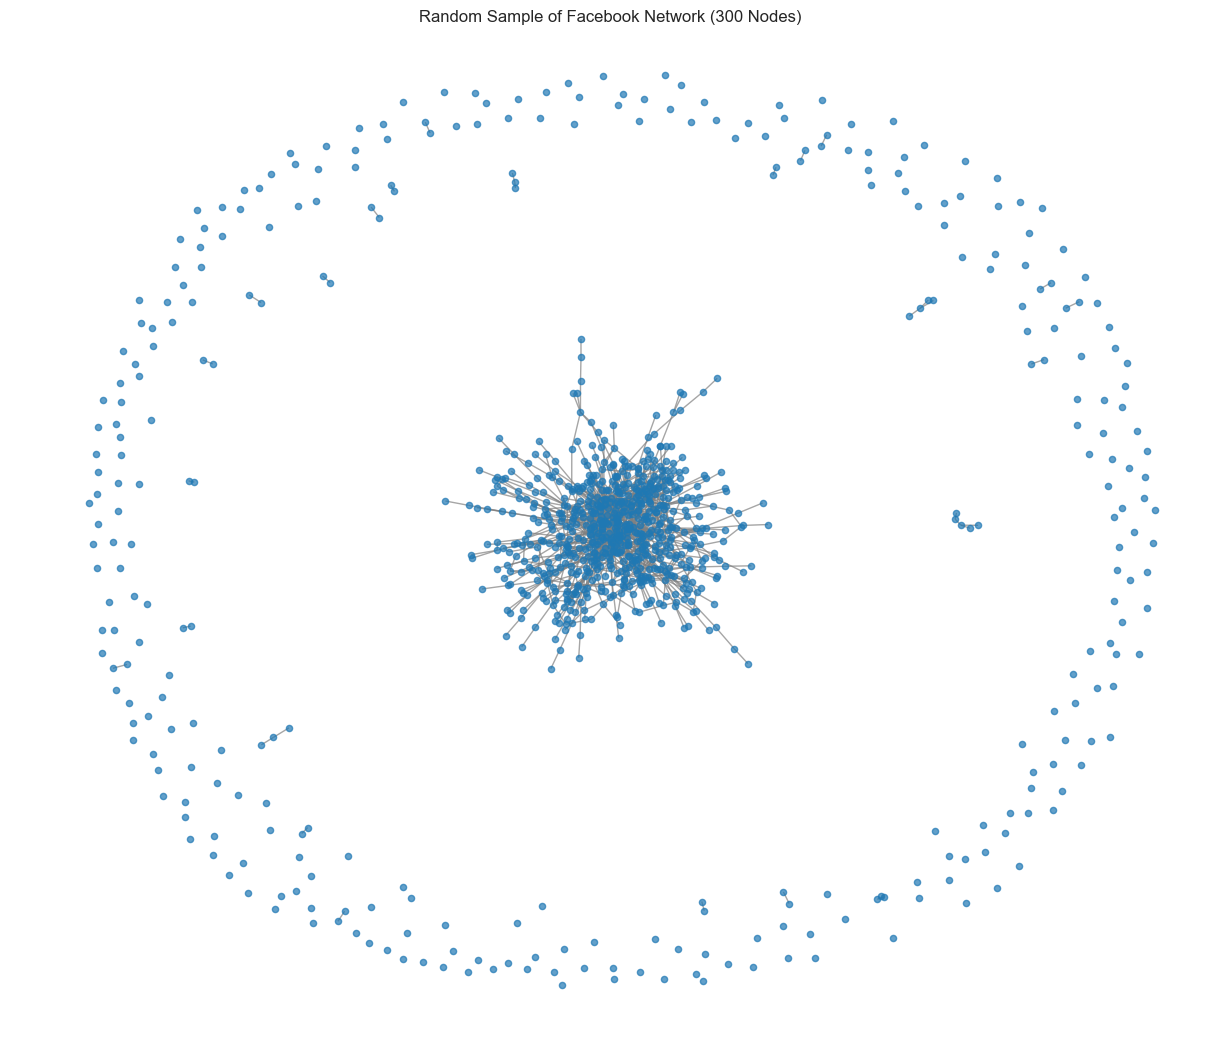

In [33]:
import random

# Sample a subset of nodes (e.g., 300) and create a subgraph
sample_nodes = random.sample(list(G.nodes()), 1000)

subgraph = G.subgraph(sample_nodes)

# Draw the subgraph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, node_size=20, edge_color='gray', alpha=0.7)
plt.title("Random Sample of Facebook Network (300 Nodes)")
plt.tight_layout()
plt.savefig("../outputs/sample_graph_plot.png", dpi=300)
plt.show()

### Compute Centrality Measures

In [12]:
import random
import pandas as pd

# Sample a smaller subgraph
sample_nodes = random.sample(list(G.nodes()), 2000)
G_small = G.subgraph(sample_nodes).copy()

# Compute centrality measures on the smaller graph
degree_centrality = nx.degree_centrality(G_small)
closeness_centrality = nx.closeness_centrality(G_small)
betweenness_centrality = nx.betweenness_centrality(G_small, k=100, seed=42)

# Convert to DataFrame
centrality_df = pd.DataFrame({
    "node": list(degree_centrality.keys()),
    "degree": list(degree_centrality.values()),
    "closeness": list(closeness_centrality.values()),
    "betweenness": list(betweenness_centrality.values())
})

# Sort and display top 10 by each
top_degree = centrality_df.sort_values("degree", ascending=False).head(10)
top_closeness = centrality_df.sort_values("closeness", ascending=False).head(10)
top_betweenness = centrality_df.sort_values("betweenness", ascending=False).head(10)

print("Top 10 by Degree Centrality:")
print(top_degree)

print("\nTop 10 by Closeness Centrality:")
print(top_closeness)

print("\nTop 10 by Betweenness Centrality:")
print(top_betweenness)


Top 10 by Degree Centrality:
       node    degree  closeness  betweenness
609    2191  0.022511   0.259252     0.030750
1951   7954  0.021011   0.263906     0.029473
1981  24482  0.017009   0.253172     0.021320
1409  13655  0.015508   0.240902     0.010140
1703  23184  0.015508   0.248930     0.017286
1680  14859  0.015508   0.252202     0.020920
106     392  0.015008   0.246885     0.016237
1106  28669  0.014007   0.247061     0.016239
443   34347  0.013507   0.236409     0.013550
953   11650  0.013507   0.242168     0.025447

Top 10 by Closeness Centrality:
       node    degree  closeness  betweenness
1951   7954  0.021011   0.263906     0.029473
609    2191  0.022511   0.259252     0.030750
477   26270  0.012006   0.254853     0.017427
1981  24482  0.017009   0.253172     0.021320
1680  14859  0.015508   0.252202     0.020920
1686  31266  0.013007   0.250737     0.010969
1084  12157  0.012506   0.250192     0.018172
1703  23184  0.015508   0.248930     0.017286
1106  28669  0.014

### Visualizing Centrality Comparisons

/var/folders/vq/qqdd4_y53w9gtp3rcs6xcnzr0000gn/T/ipykernel_13915/1607992599.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="node", x="degree", data=top_degree, palette="Blues_d")
/var/folders/vq/qqdd4_y53w9gtp3rcs6xcnzr0000gn/T/ipykernel_13915/1607992599.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="node", x="closeness", data=top_closeness, palette="Greens_d")
/var/folders/vq/qqdd4_y53w9gtp3rcs6xcnzr0000gn/T/ipykernel_13915/1607992599.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="node", x="betweenness", data=top_b

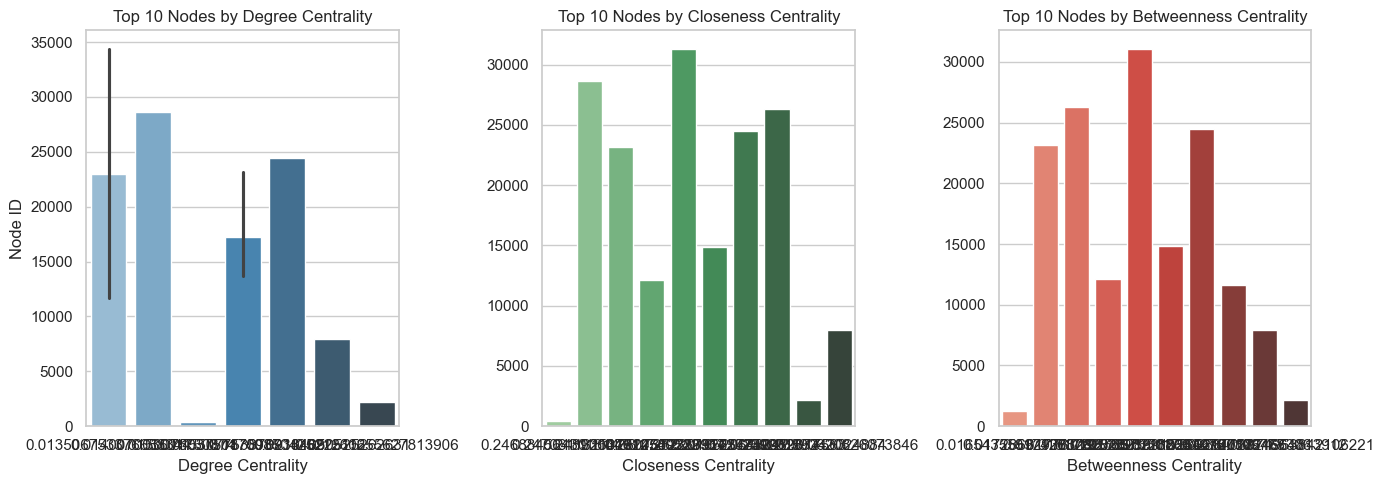

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 5))

# Degree centrality plot
plt.subplot(1, 3, 1)
sns.barplot(y="node", x="degree", data=top_degree, palette="Blues_d")
plt.title("Top 10 Nodes by Degree Centrality")
plt.xlabel("Degree Centrality")
plt.ylabel("Node ID")

# Closeness centrality plot
plt.subplot(1, 3, 2)
sns.barplot(y="node", x="closeness", data=top_closeness, palette="Greens_d")
plt.title("Top 10 Nodes by Closeness Centrality")
plt.xlabel("Closeness Centrality")
plt.ylabel("")

# Betweenness centrality plot
plt.subplot(1, 3, 3)
sns.barplot(y="node", x="betweenness", data=top_betweenness, palette="Reds_d")
plt.title("Top 10 Nodes by Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("")

plt.tight_layout()
plt.savefig("../outputs/centrality_comparison.png", dpi=300)
plt.show()


## Community Detection

### Spectral Clustering

/var/folders/vq/qqdd4_y53w9gtp3rcs6xcnzr0000gn/T/ipykernel_13915/74780903.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


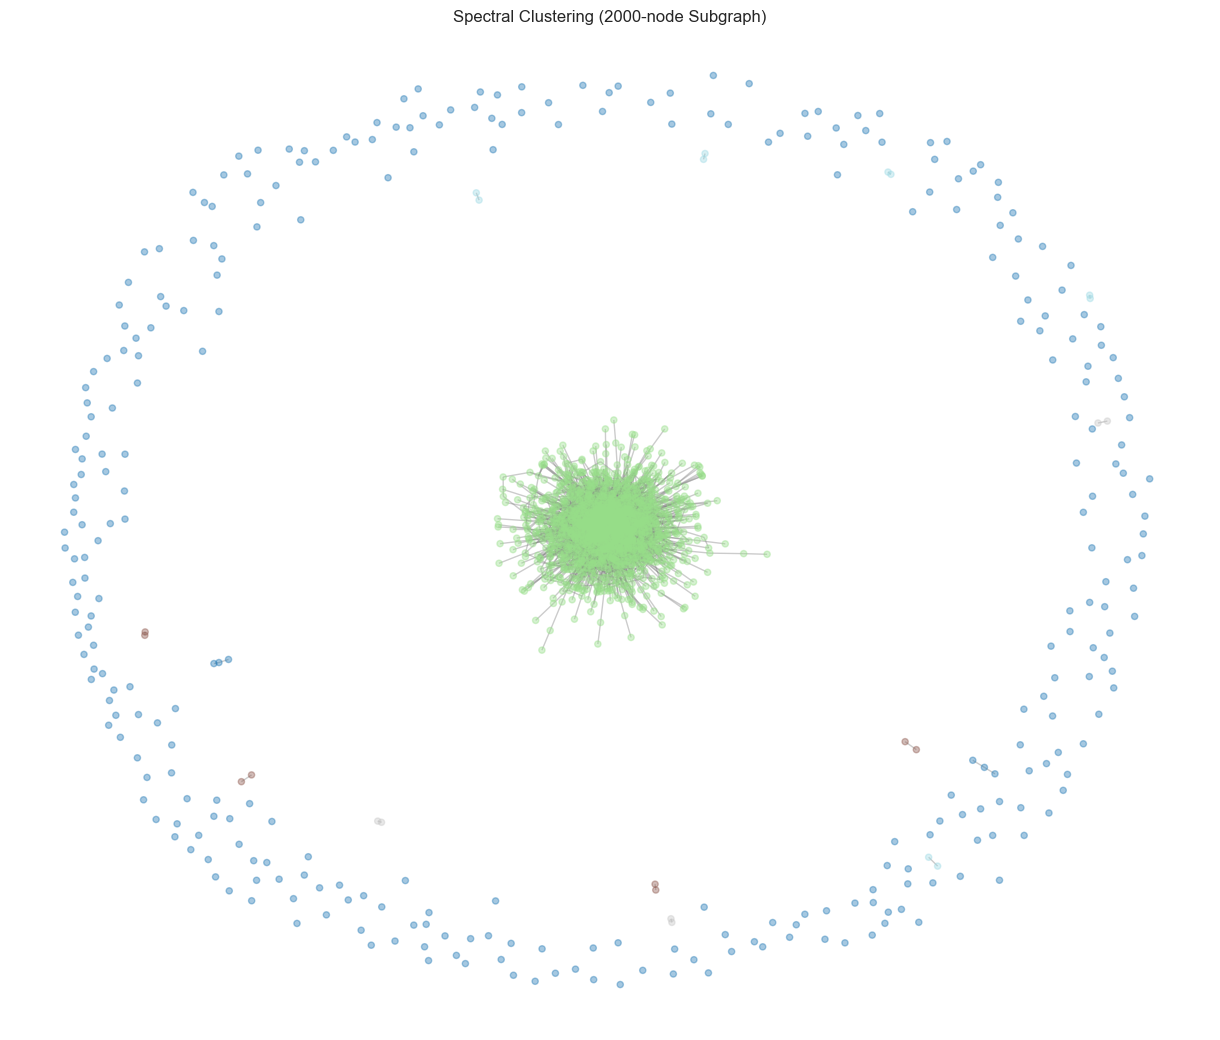

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.linalg import eigh
import numpy as np

# Step 1: Build Adjacency and Laplacian Matrices
A = nx.to_numpy_array(G_small)
D = np.diag(np.sum(A, axis=1))
D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(A, axis=1) + 1e-10))
L = np.eye(len(G_small)) - D_inv_sqrt @ A @ D_inv_sqrt

# Step 2: Eigen Decomposition using stable solver
eigvals, eigvecs = eigh(L)
k = 5  # Number of communities
eigvecs = eigvecs[:, :k]

# Normalize and Cluster
X = normalize(eigvecs)
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)


# Step 4: Map labels to nodes
node_list = list(G_small.nodes())
spectral_map = dict(zip(node_list, labels))

# Add to DataFrame if useful later
centrality_df["spectral_cluster"] = centrality_df["node"].map(spectral_map)

# Visualization
colors = [spectral_map[n] % 20 for n in node_list]
pos = nx.spring_layout(G_small, seed=42)

plt.figure(figsize=(12, 10))
nx.draw(G_small, pos, node_color=colors, cmap=plt.cm.tab20, node_size=20, edge_color='gray', alpha=0.4)
plt.title("Spectral Clustering (2000-node Subgraph)")
plt.axis('off')
plt.tight_layout()
plt.savefig("../outputs/spectral_clustering_2000.png", dpi=300)
plt.show()



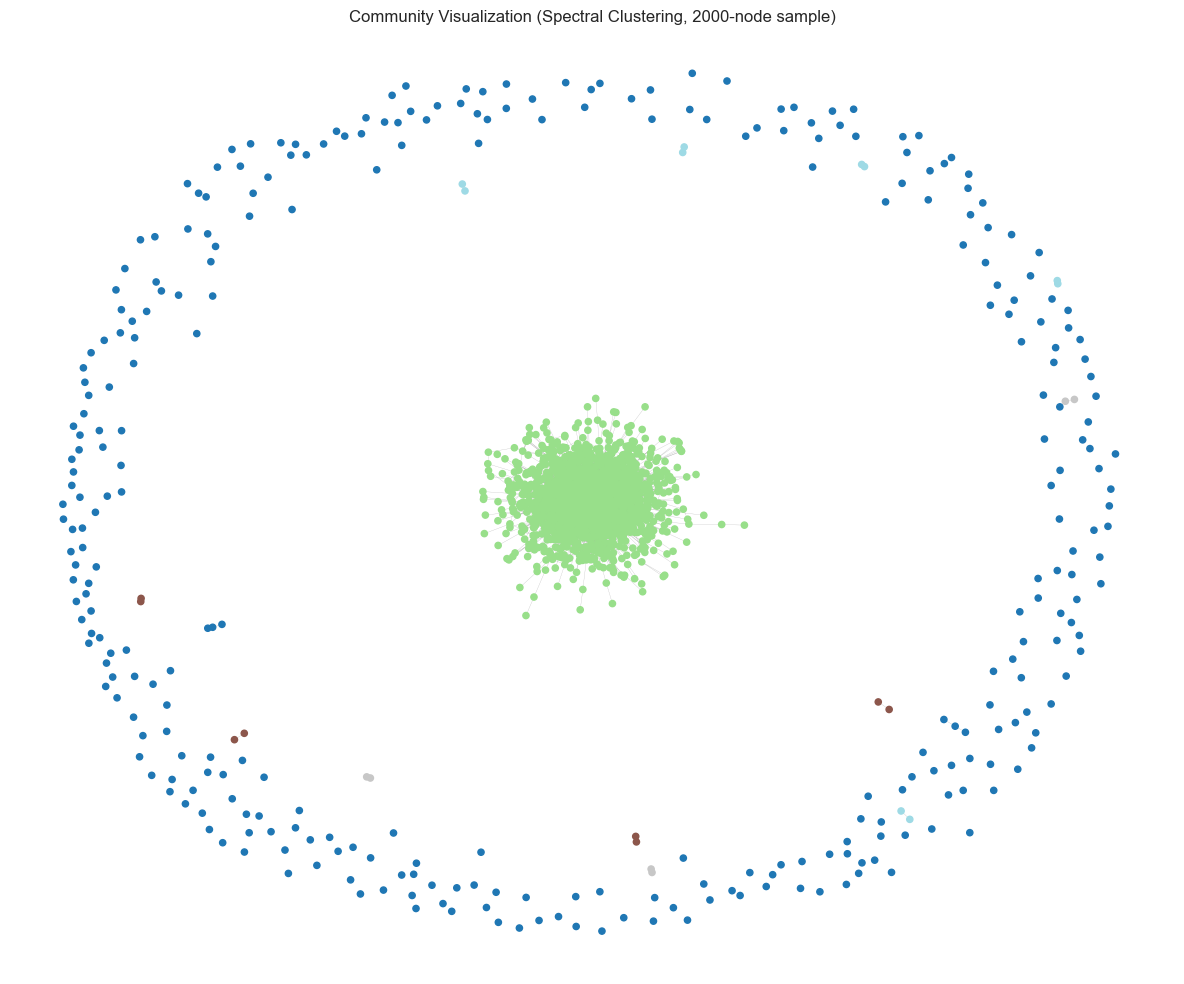

In [47]:
import matplotlib.pyplot as plt

# Layout for drawing (reuse same layout for consistency)
pos = nx.spring_layout(G_small, seed=42)

# Get list of nodes in G_small
nodes = list(G_small.nodes())

# Filter centrality_df to include only nodes in G_small
centrality_subset = centrality_df[centrality_df["node"].isin(nodes)]

# Ensure the mapping aligns with node order
spectral_colors = centrality_subset.set_index("node").reindex(nodes)["spectral_cluster"].map(lambda x: x % 20)

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G_small, pos, node_color=spectral_colors, cmap=plt.cm.tab20, node_size=20)
nx.draw_networkx_edges(G_small, pos, alpha=0.3, width=0.2)
plt.title("Community Visualization (Spectral Clustering, 2000-node sample)")
plt.axis('off')
plt.tight_layout()
plt.savefig("../outputs/spectral_clustering_visualization.png", dpi=300)
plt.show()


In [48]:
centrality_df["spectral_cluster"].value_counts()


spectral_cluster
1    1663
0     313
4      10
2       8
3       6
Name: count, dtype: int64

Girvan-Newman: Found 323 communities at first split.


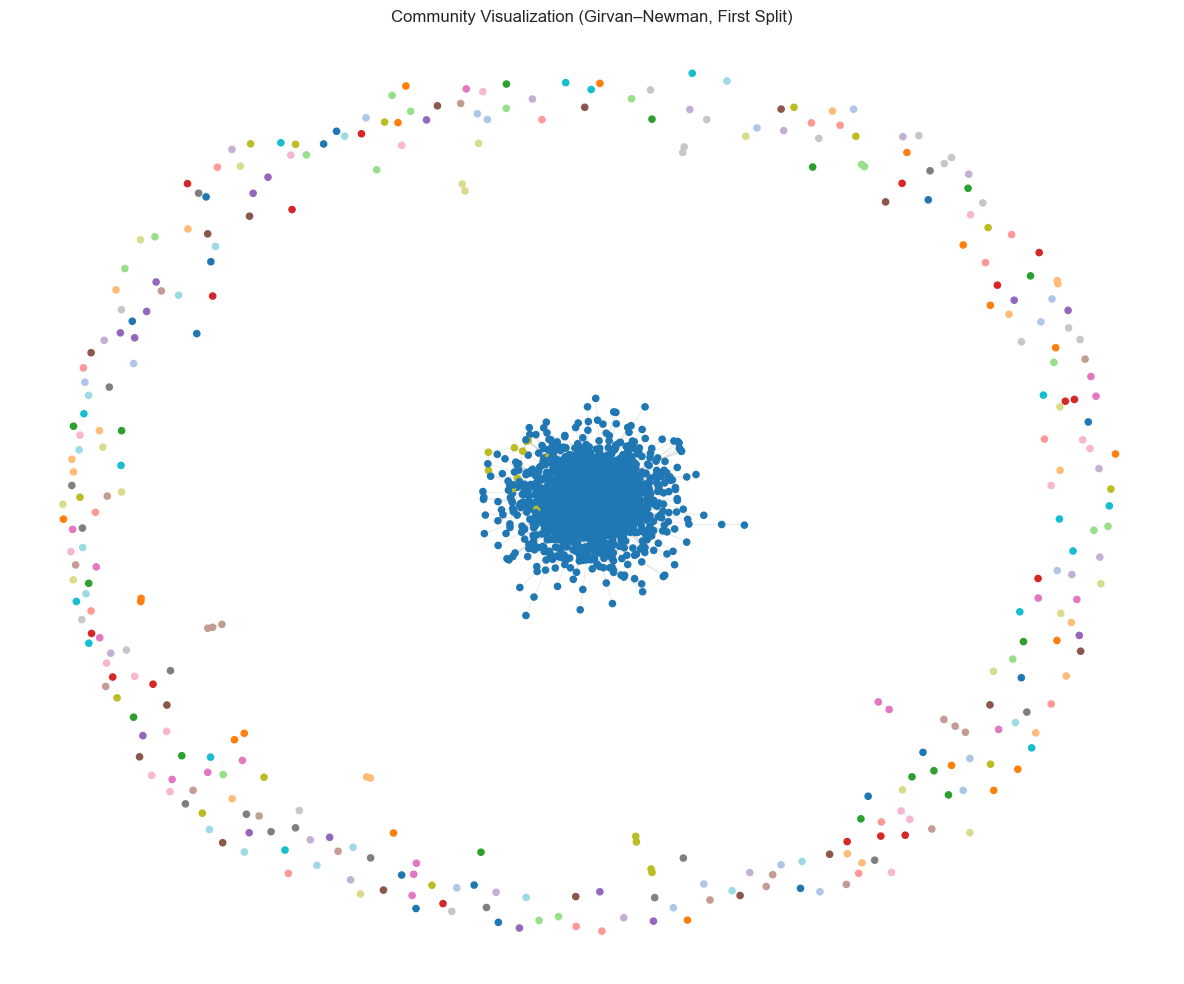

In [19]:
from networkx.algorithms.community import girvan_newman

# Applying Girvan-Newman to get first-level communities
gn_generator = girvan_newman(G_small)
gn_communities = next(gn_generator)  # First split only
gn_communities = [list(c) for c in gn_communities]

print(f"Girvan-Newman: Found {len(gn_communities)} communities at first split.")

# Assign community label to each node
gn_map = {}
for idx, community in enumerate(gn_communities):
    for node in community:
        gn_map[node] = idx

# Map node to community color (modulo 20 for color cycling)
gn_colors = centrality_df.set_index("node").index.map(lambda x: gn_map.get(x, -1) % 20)

# Visualize Girvan–Newman communities
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G_small, pos, node_color=gn_colors, cmap=plt.cm.tab20, node_size=20)
nx.draw_networkx_edges(G_small, pos, alpha=0.3, width=0.2)
plt.title("Community Visualization (Girvan–Newman, First Split)")
plt.axis('off')
plt.tight_layout()
plt.savefig("../outputs/gn_community_visualization.png", dpi=300)
plt.show()


Largest clique size: 8
Nodes in the largest clique: [13655, 16105, 22620, 28508, 28018, 35866, 24154, 18812]


/var/folders/vq/qqdd4_y53w9gtp3rcs6xcnzr0000gn/T/ipykernel_13915/2832706454.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


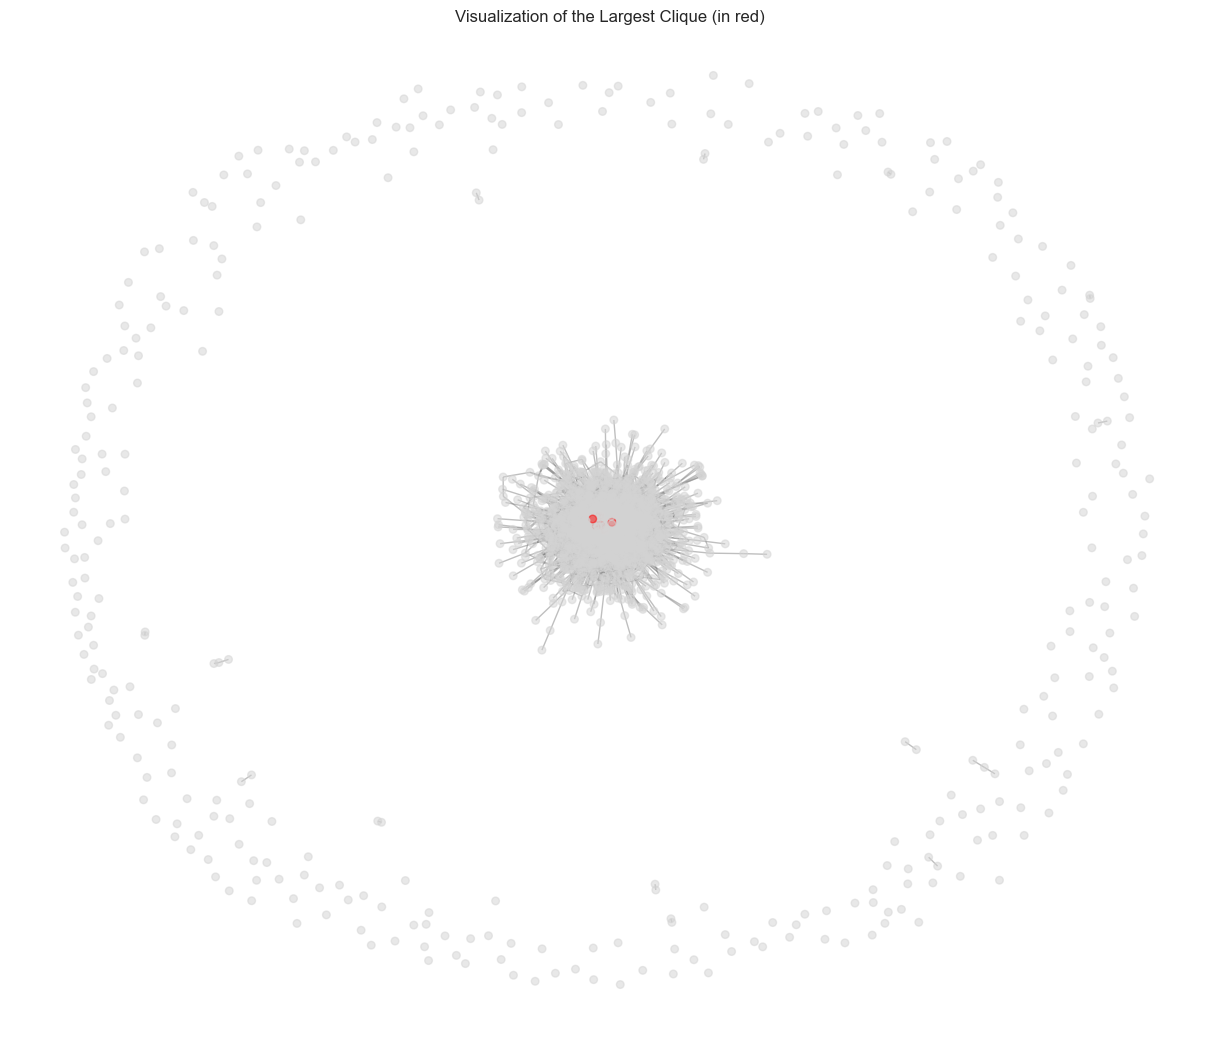

In [49]:
# Finding the largest clique
largest_clique = max(nx.find_cliques(G_small), key=len)
print(f"Largest clique size: {len(largest_clique)}")
print("Nodes in the largest clique:", largest_clique)

# Visualizing the clique in red, rest in gray
clique_nodes = set(largest_clique)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_small, seed=42)

# Color nodes
node_colors = ['red' if node in clique_nodes else 'lightgray' for node in G_small.nodes()]
nx.draw(G_small, pos, node_color=node_colors, node_size=30, edge_color='gray', alpha=0.5)

plt.title("Visualization of the Largest Clique (in red)")
plt.axis('off')
plt.tight_layout()
plt.savefig("../outputs/largest_clique.png", dpi=300)
plt.show()


Number of heavy hitters: 117
Sample heavy hitters:
      node    degree  closeness  betweenness  community  spectral_cluster
6    8221  0.011006   0.238779     0.008604          0                 1
21  24658  0.009005   0.222371     0.002285          1                 1
26  16478  0.007504   0.234444     0.001646          0                 1
46  16584  0.011506   0.242807     0.014844          1                 1
57  24835  0.011506   0.243577     0.007076          0                 1


/var/folders/vq/qqdd4_y53w9gtp3rcs6xcnzr0000gn/T/ipykernel_13915/214872571.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


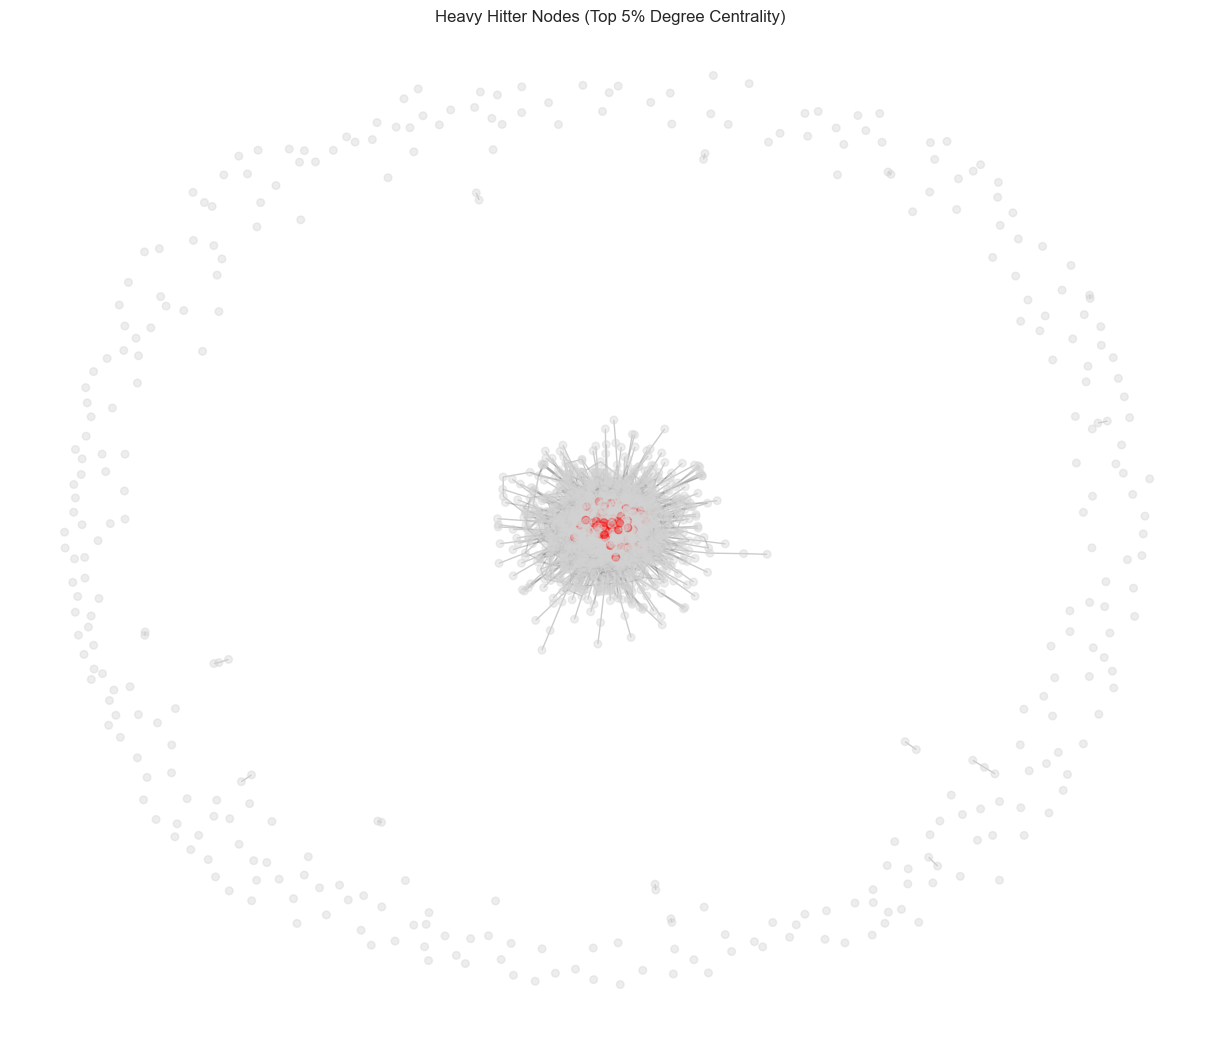

In [50]:
# Set threshold for top 5%
threshold = centrality_df["degree"].quantile(0.95)

# Filter heavy hitters
heavy_hitters = centrality_df[centrality_df["degree"] >= threshold]
print(f"Number of heavy hitters: {len(heavy_hitters)}")
print("Sample heavy hitters:\n", heavy_hitters.head())

# Visualize them in red on the full subgraph
hh_nodes = set(heavy_hitters["node"])

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_small, seed=42)

node_colors = ['red' if node in hh_nodes else 'lightgray' for node in G_small.nodes()]
nx.draw(G_small, pos, node_color=node_colors, node_size=30, edge_color='gray', alpha=0.4)

plt.title("Heavy Hitter Nodes (Top 5% Degree Centrality)")
plt.axis('off')
plt.tight_layout()
plt.savefig("../outputs/heavy_hitters.png", dpi=300)
plt.show()
